In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
import numpy as np


# Select case

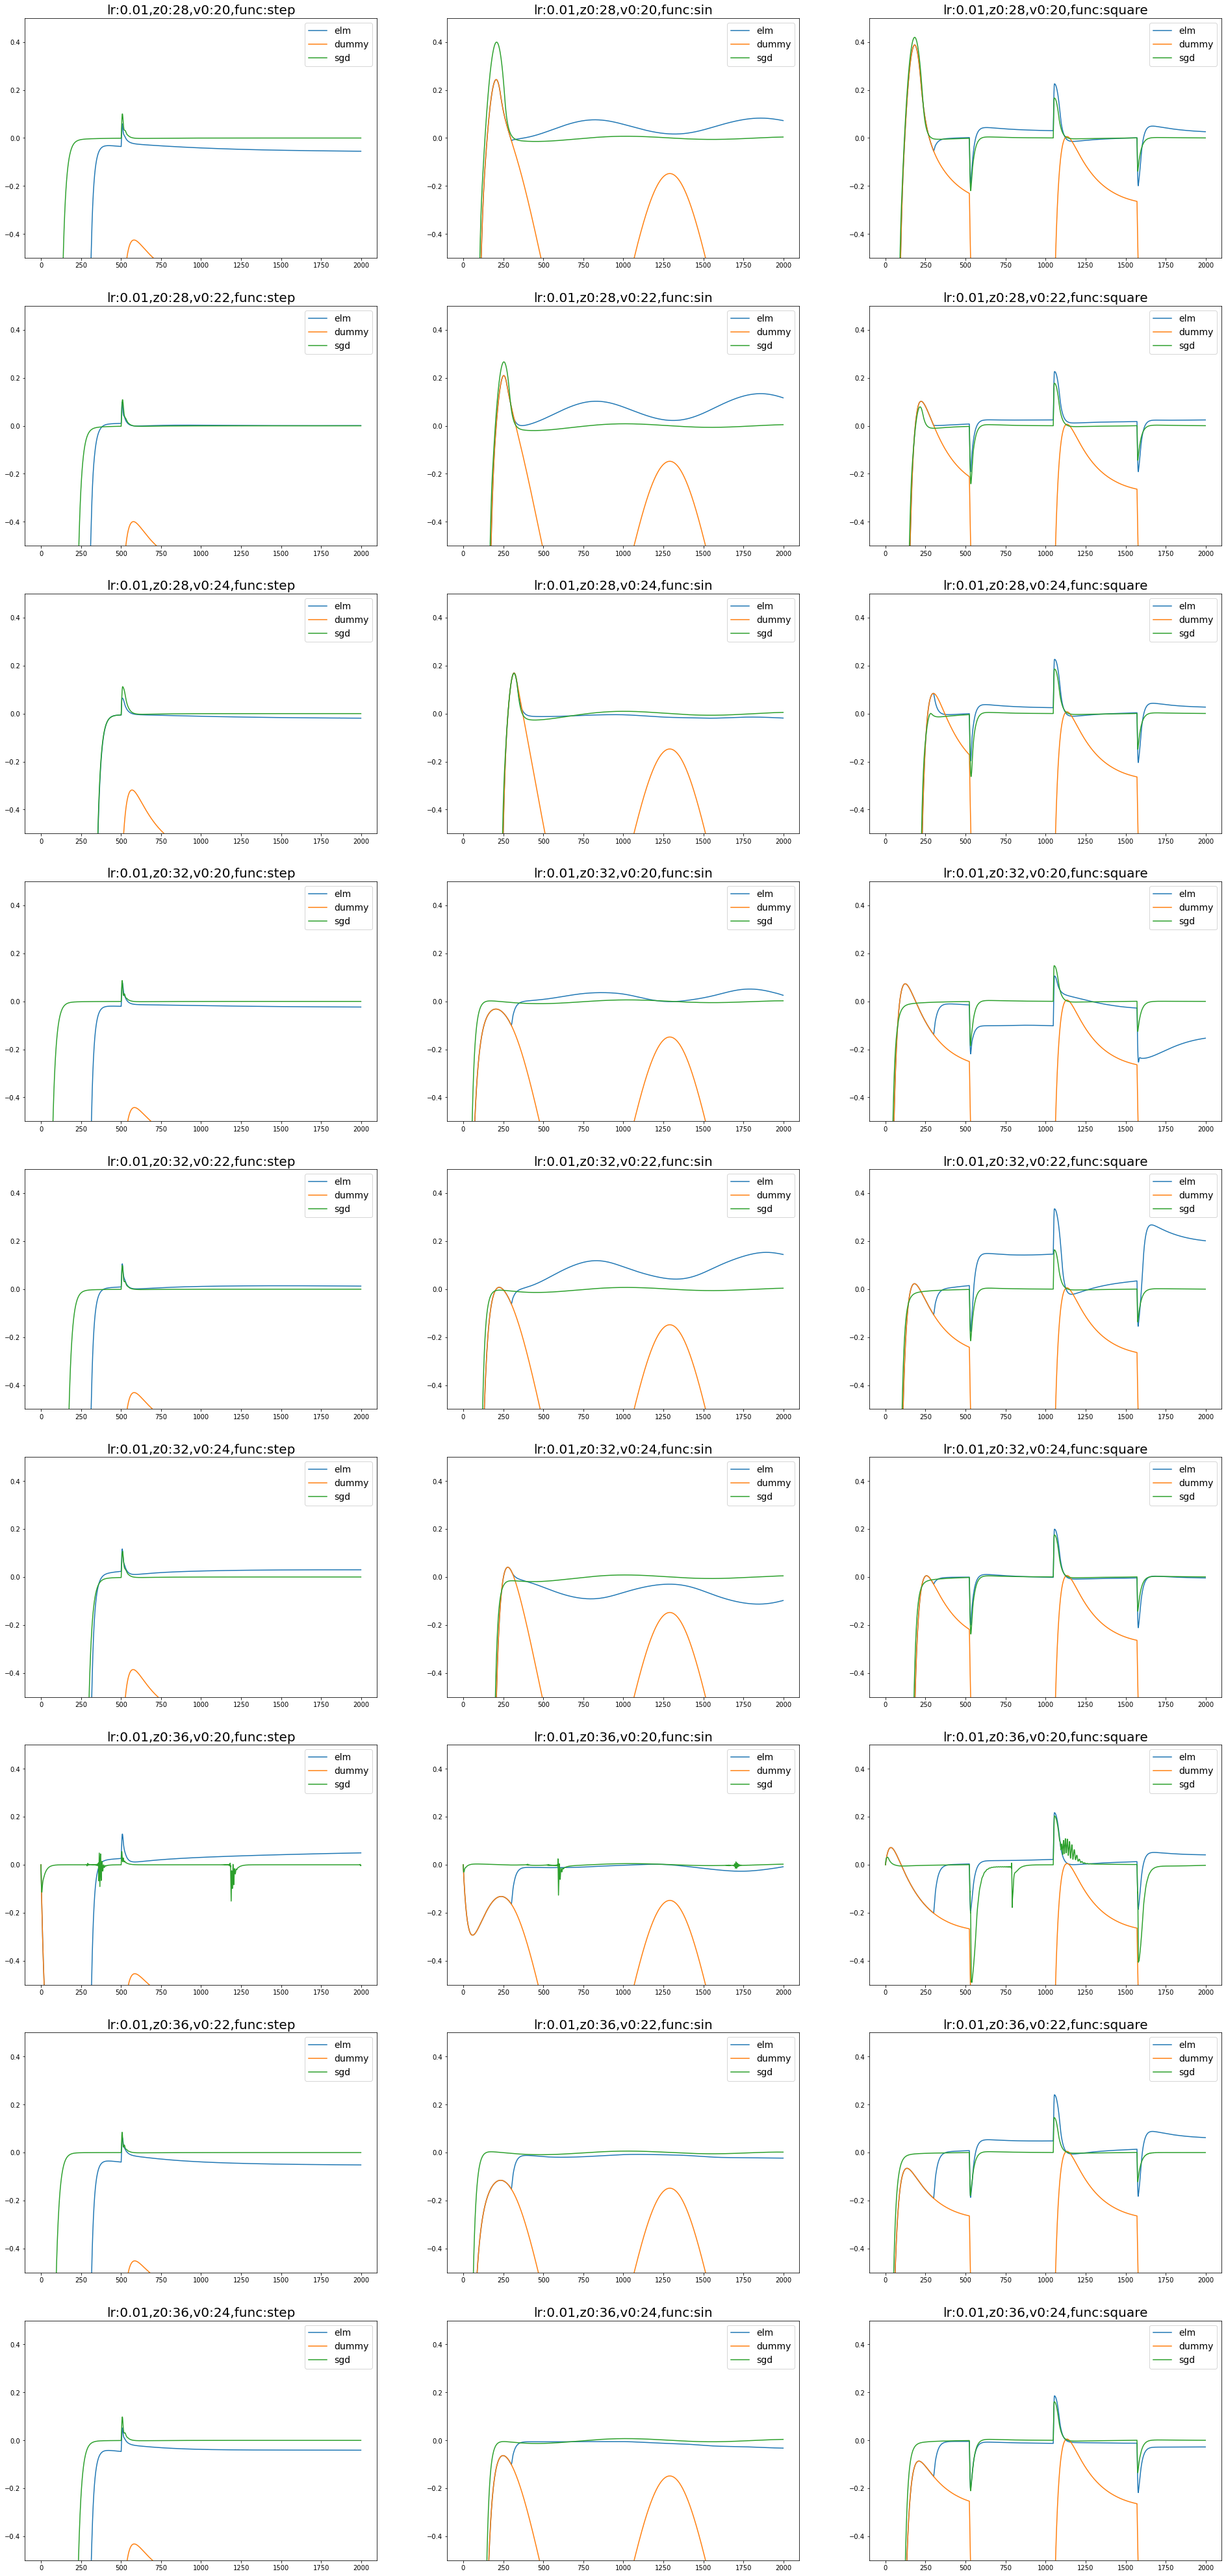

In [92]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
lrs = [1e-2]

z0s = [28,32,36] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20,22,24] # [20]#[20,22,24,26]
funcs = ["step", "sin", "square"]

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s)))
f, ax = plt.subplots(cases, 3, figsize = (33,cases*8))



t_min = 0
t_max = -1#1000
i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values), linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1

i = 0
data_dir = '../data/dummy'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "z0_{}_v0_{}_func_{}.csv".format(z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1
    
    
i = 0
data_dir = '../data/sgd'
for lr, z0, v0 in itertools.product(lrs, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].legend(['elm','dummy','sgd'], fontsize = 14)
        
        ax[i,j].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
        ax[i,j].set_ylim([-0.5,0.5])

        
    i=i+1

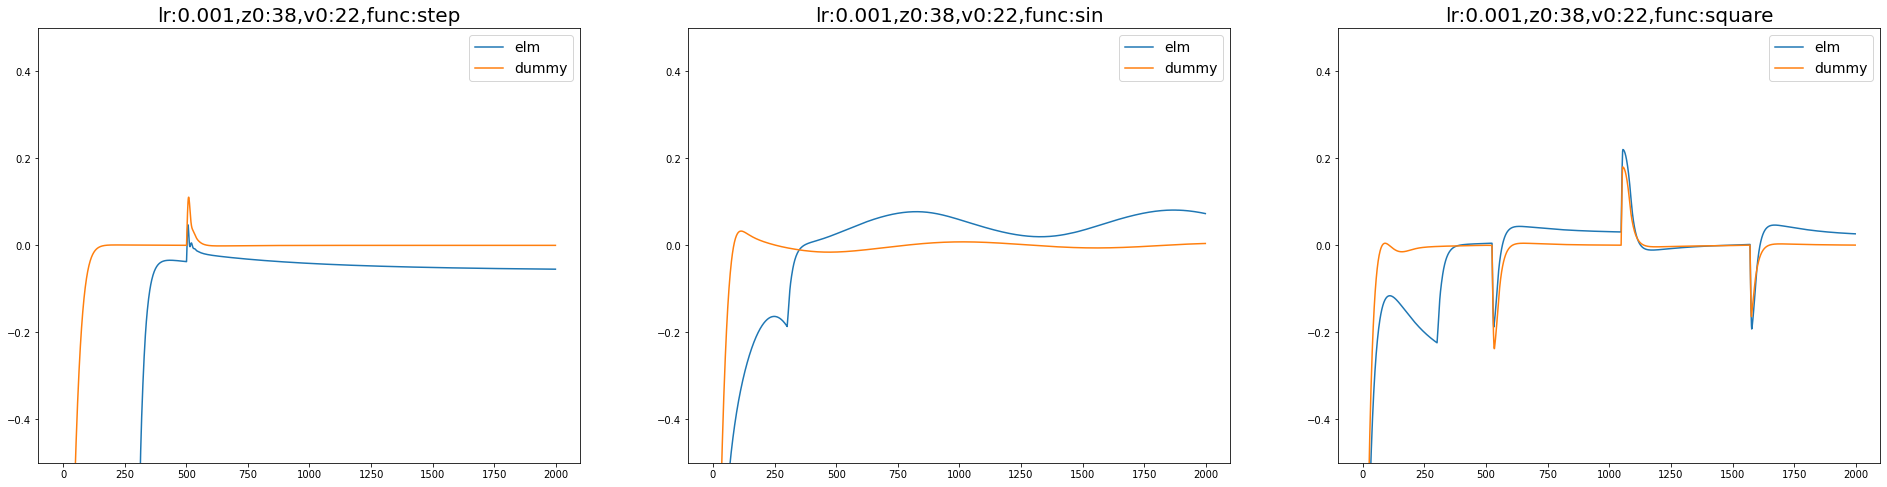

In [9]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
lrs = [1e-3]
z0s = [38]#[28,32,36] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [22]#[20,22,24] # [20]#[20,22,24,26]
funcs = ["step", "sin", "square"]

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s)))
f, ax = plt.subplots(cases, 3, figsize = (33,cases*8))



t_min = 0
t_max = -1#1000
i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values), linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1

i = 0
data_dir = '../data/dummy'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "z0_{}_v0_{}_func_{}.csv".format(z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1

i = 0
data_dir = '../data/sgd'
for lr, z0, v0 in itertools.product(lrs, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[j].legend(['elm','dummy','sgd'], fontsize = 14)
        
        ax[j].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
        ax[j].set_ylim([-0.5,0.5])

        
    i=i+1

# Plot 1: dot{h}

In [20]:
cases = ['elm', 'sgd','oDA_elm', "oFW_elm", "dummy"]
cases = ['elm', 'sgd', 'dummy']

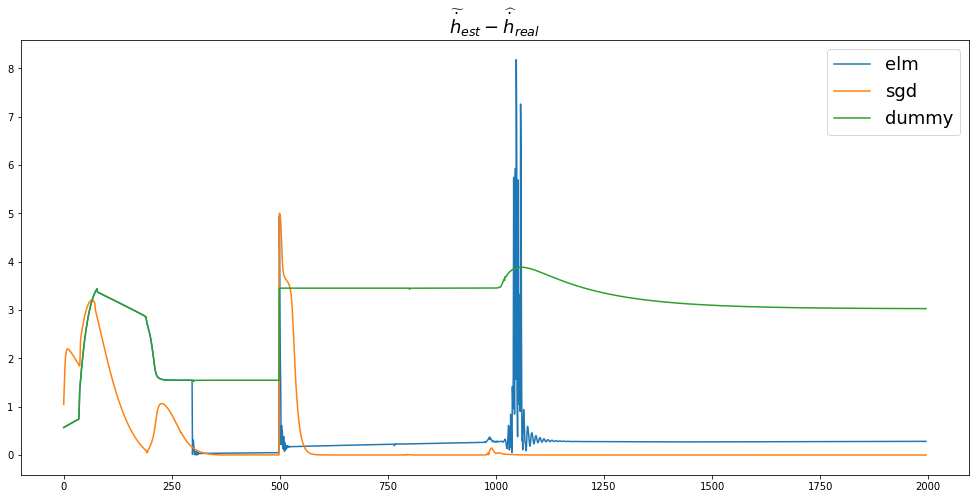

In [25]:
func_name = "step"

f, ax = plt.subplots(1,1,figsize = (17,8))

dir_name = "../data/exp"

t_min = 3
t_max = -1

for i, case in enumerate(cases):
    df = pd.read_csv("{}/{}_{}.csv".format(dir_name, case, func_name))

    ax.set_title('$\widetilde{\dot{h}}$', fontsize = 18)

    # First plot 
    ax.plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values))
    #ax[i,0].plot(, 'k')
    ax.set_title('$\widetilde{\dot{h}}_{est}-\widehat{\dot{h}}_{real}$', fontsize = 18)
    ax.legend(cases, fontsize = 18)



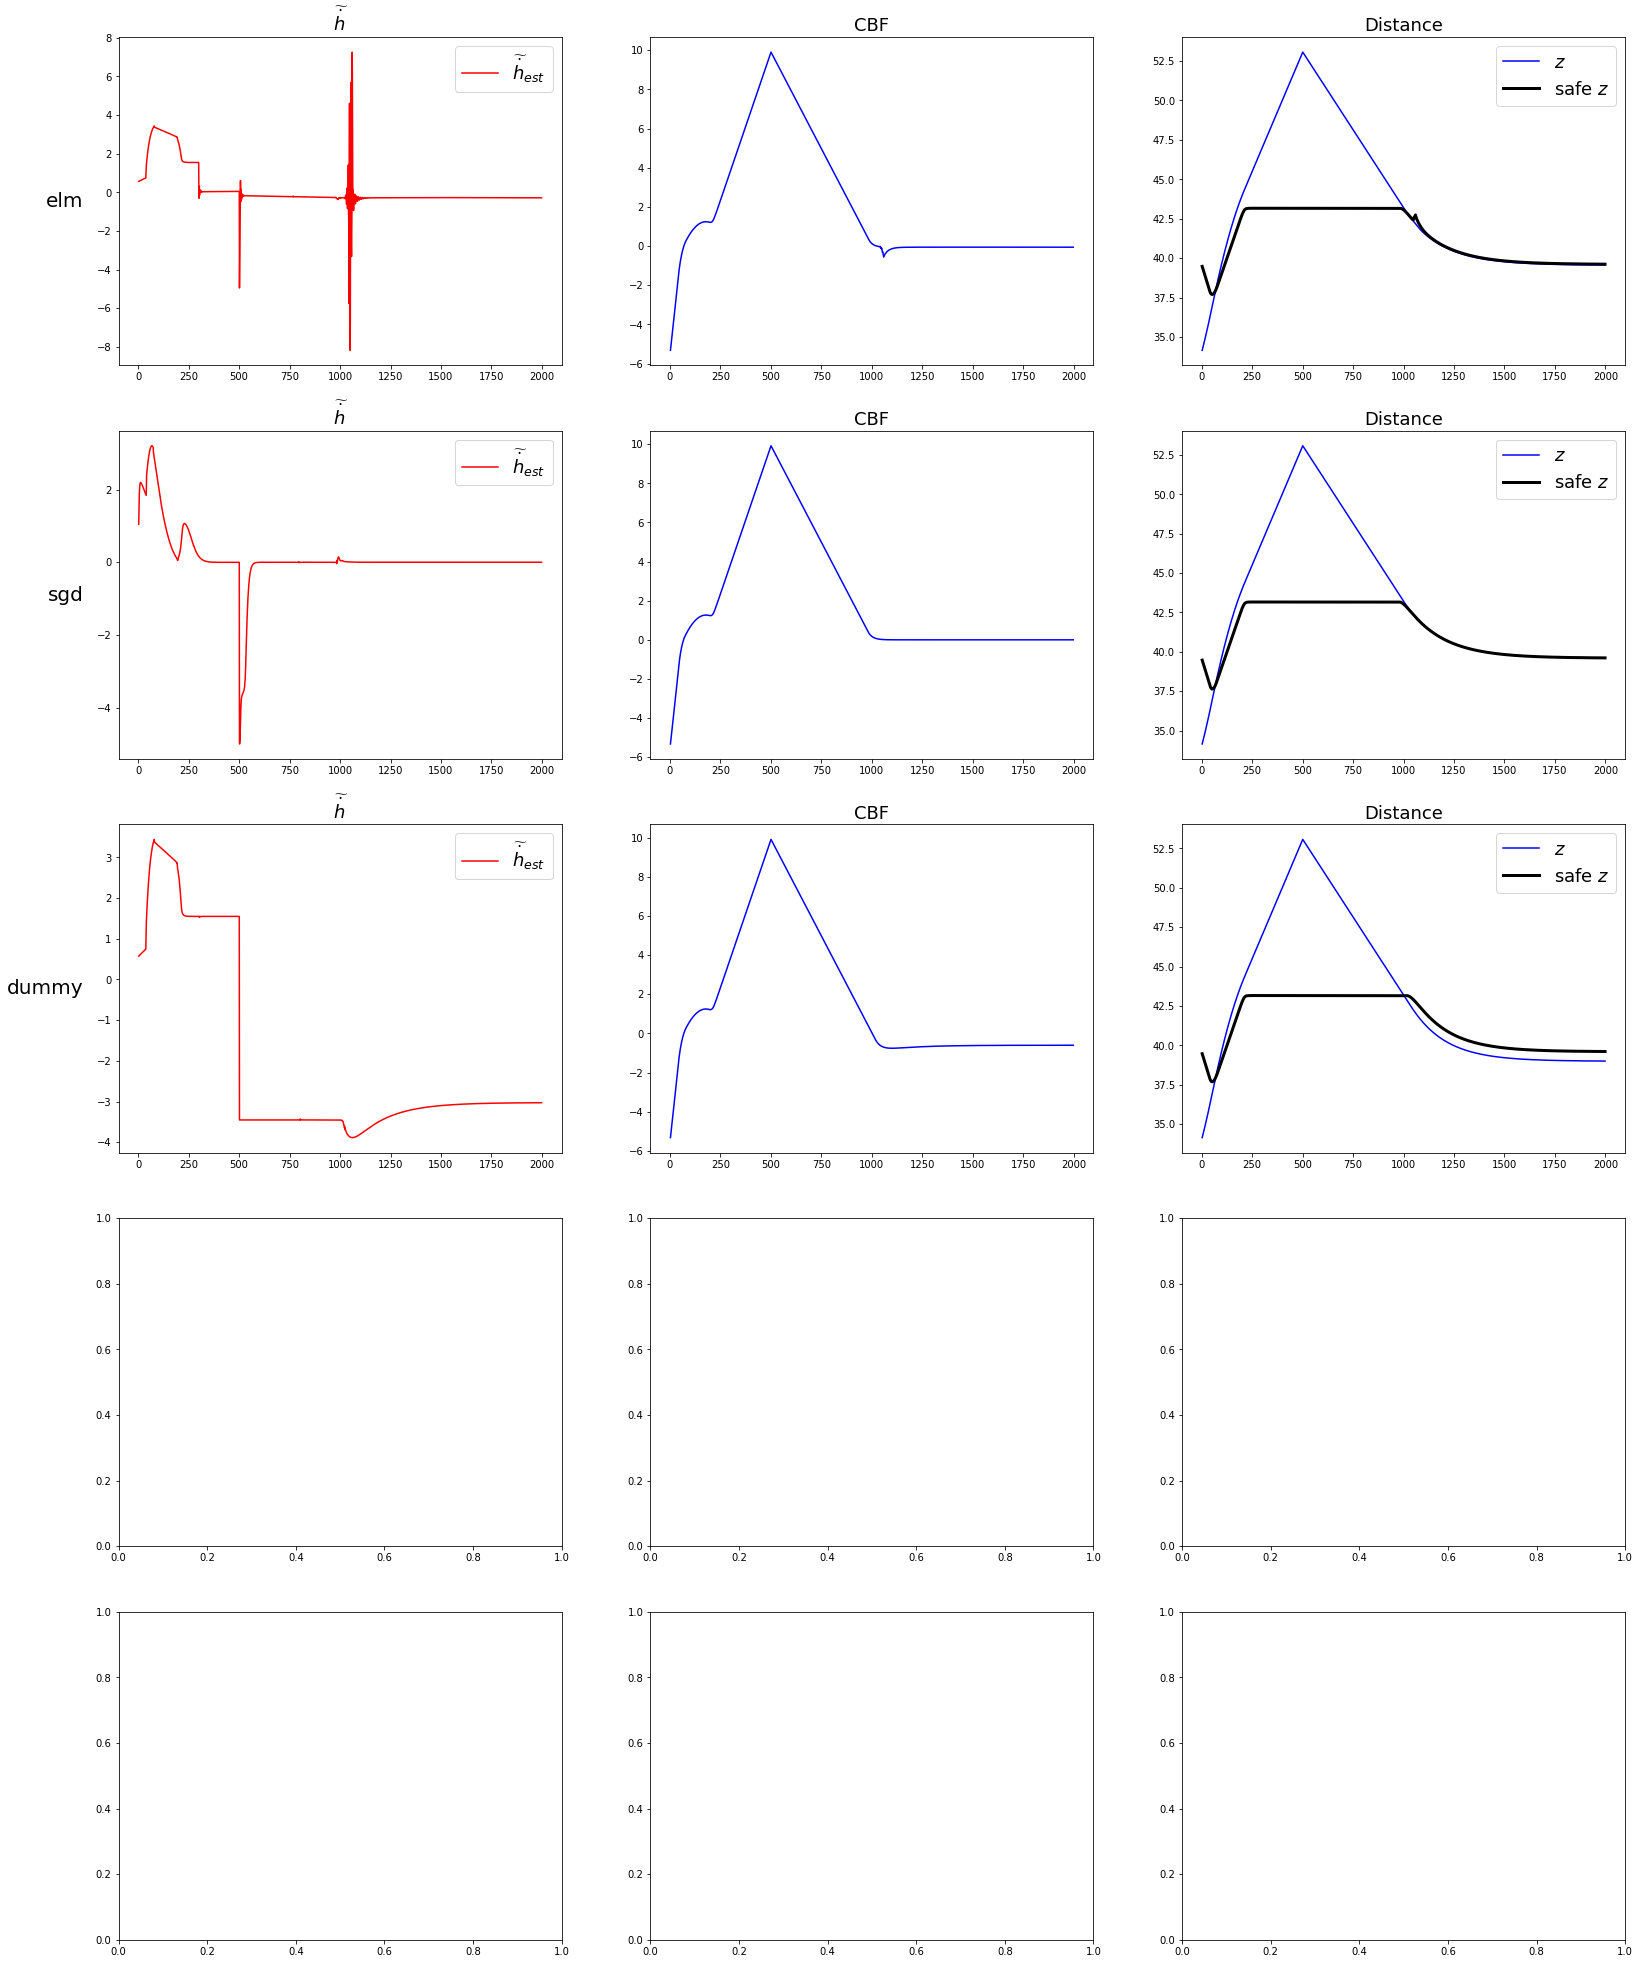

In [28]:
func_name = "step"
f, ax = plt.subplots(5,3,figsize = (27,35))

dir_name = "../data/exp"

t_min = 3
t_max = -1

for i, case in enumerate(cases):
    df = pd.read_csv("{}/{}_{}.csv".format(dir_name, case, func_name))

    ax[i,0].set_title('$\widetilde{\dot{h}}$', fontsize = 18)

    # First plot 
    ax[i,0].plot(df['dhe_real'][t_min:t_max] - df['dhe'][t_min:t_max], 'r')
    #ax[i,0].plot(, 'k')
    ax[i,0].legend(['$\widetilde{\dot{h}}_{est}$','$\widehat{\dot{h}}_{real}$'], fontsize = 18)

    # Second plot
    ax[i,1].set_title('CBF', fontsize = 18)
    ax[i,1].plot(df['h'][t_min:t_max], 'b')

    # Third plot
    ax[i,2].set_title('Distance', fontsize = 18)

    ax[i,2].plot(df['z'][t_min:t_max], 'b')
    v = df['v'][t_min:t_max]
    ax[i,2].plot(1.8*v, linewidth=3, color = 'k')
    ax[i,2].legend(['$z$', 'safe $z$'], fontsize = 18)


pad = 5
for axy, row in zip(ax[:,0], cases):
    axy.annotate(row,xy=(0, 0.5), xytext=(-axy.yaxis.labelpad-pad,0),                    
                xycoords=axy.yaxis.label, textcoords='offset points',
                size=20, ha='right', va='center')
